<a href="https://colab.research.google.com/github/sahil9022-crypto/Loan-Approval-Prediction/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn gradio


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Upload Dataset
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Education vs Loan Status')

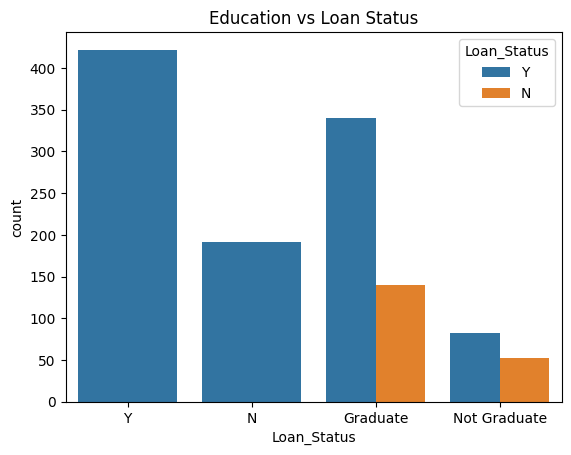

In [8]:
# Load data
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Unzip the uploaded file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

# Basic info
df.head()
df.info()
df.describe()
df.isnull().sum()

# Visuals
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Status")

sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")

In [7]:
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    print(zip_ref.namelist())

['test_Y3wMUE5_7gLdaTN.csv', 'train_u6lujuX_CVtuZ9i.csv']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Education vs Loan Status')

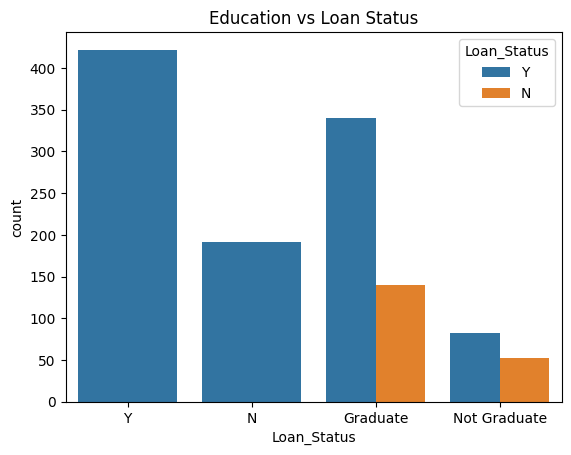

In [10]:
# Load data
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

# Basic info
df.head()
df.info()
df.describe()
df.isnull().sum()

# Visuals
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Status")

sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")

In [11]:
# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-11-1236784935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-11-1236784935.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [12]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
 [[18 25]
 [ 1 79]]
--- Random Forest ---
Accuracy: 0.7642276422764228
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

Confusion Matrix:
 [[18 25]
 [ 4 76]]


In [13]:
import gradio as gr

def predict_loan(Gender, Married, Education, Self_Employed, ApplicantIncome,
                 CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area):
    input_df = pd.DataFrame({
        'Gender': [Gender],
        'Married': [Married],
        'Education': [Education],
        'Self_Employed': [Self_Employed],
        'ApplicantIncome': [ApplicantIncome],
        'CoapplicantIncome': [CoapplicantIncome],
        'LoanAmount': [LoanAmount],
        'Loan_Amount_Term': [Loan_Amount_Term],
        'Credit_History': [Credit_History],
        'Property_Area': [Property_Area]
    })

    for col in input_df.columns:
        if input_df[col].dtype == 'object':
            input_df[col] = le.fit(df[col]).transform(input_df[col])

    result = rf.predict(input_df)
    return "Approved ✅" if result[0] == 1 else "Not Approved ❌"

gr.Interface(fn=predict_loan,
             inputs=[
                 gr.Dropdown(["Male", "Female"], label="Gender"),
                 gr.Dropdown(["Yes", "No"], label="Married"),
                 gr.Dropdown(["Graduate", "Not Graduate"], label="Education"),
                 gr.Dropdown(["Yes", "No"], label="Self Employed"),
                 gr.Number(label="Applicant Income"),
                 gr.Number(label="Coapplicant Income"),
                 gr.Number(label="Loan Amount"),
                 gr.Number(label="Loan Amount Term"),
                 gr.Dropdown([1.0, 0.0], label="Credit History"),
                 gr.Dropdown(["Urban", "Rural", "Semiurban"], label="Property Area")
             ],
             outputs="text").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d9df83bddf404a1570.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 💳 Loan Approval Prediction System

A beginner-to-intermediate level Machine Learning project that predicts loan approval status using Logistic Regression and Random Forest.

## ✅ Features:
- Clean EDA with visualizations
- Categorical encoding & null handling
- Logistic Regression and Random Forest models
- Evaluation metrics included
- Optional dashboard using Gradio
- Deployment-ready structure

## 📦 Dataset
[Kaggle Loan Prediction Dataset](https://www.kaggle.com/datasets)

## 📊 Tools Used
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Scikit-Learn
- Gradio (for mini dashboard)
- Google Colab
- GitHub for version control

## 🚀 How to Use
1. Clone the repo
2. Run the notebook in Google Colab
3. Optionally launch the Gradio dashboard

---
